In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(r"drugsComTrain_raw.csv")

In [3]:
df.head(5)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [4]:
df.shape

(161297, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     161297 non-null  int64 
 1   drugName     161297 non-null  object
 2   condition    160398 non-null  object
 3   review       161297 non-null  object
 4   rating       161297 non-null  int64 
 5   date         161297 non-null  object
 6   usefulCount  161297 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 8.6+ MB


In [6]:
df.isnull().sum()

uniqueID         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

The dataset shows that there are missing values in the condition column, with 899 entries lacking this information. All other columns, including drugName, review, rating, date, and usefulCount, have no missing values.

In [7]:
df.dropna(inplace=True,axis=0)

dropped null values in the "condition" column because the dataset contains a large number of entries (161,297), and the missing values in the "condition" column (899 entries) represent a relatively small portion. Removing these entries helps maintain data integrity and ensures the analysis is conducted on a dataset with complete information for the specified column.

In [8]:
print("Number of Unique Drugs present in the Dataset :", df['drugName'].nunique())
print("Number of Unique Medical Conditions present in the Dataset :", df['condition'].nunique())

Number of Unique Drugs present in the Dataset : 3431
Number of Unique Medical Conditions present in the Dataset : 884


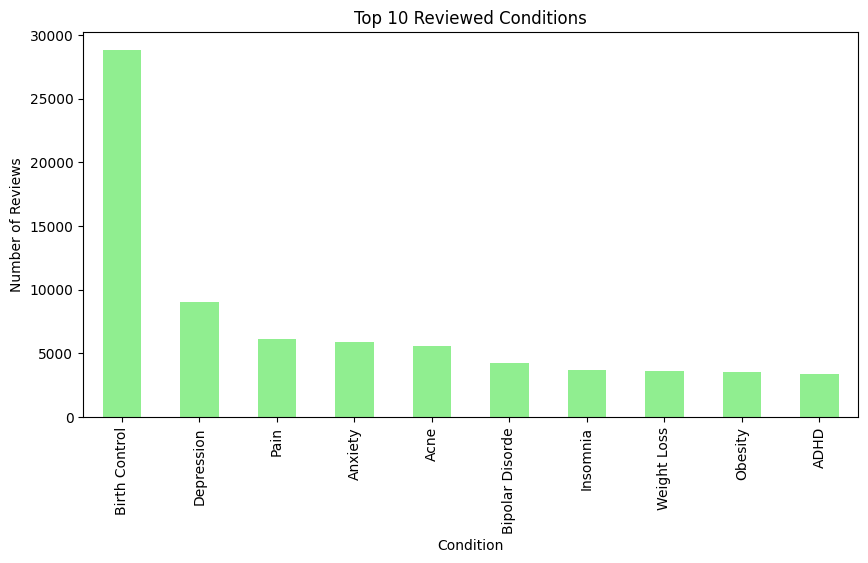

In [9]:
top_conditions = df['condition'].value_counts().sort_values(ascending=False)[:10]
top_conditions.plot(kind='bar', figsize=(10, 5), color='lightgreen')
plt.title('Top 10 Reviewed Conditions')
plt.xlabel('Condition')
plt.ylabel('Number of Reviews')
plt.xticks()
plt.show()


This  bar chart to visually present the top 10 reviewed medical conditions in the dataset. The value_counts() method is used to count the occurrences of each unique condition, and sort_values(ascending=False) arranges them in descending order based on the review counts. The resulting top 10 conditions are then plotted as a bar chart using plot(kind='bar').

The graph provides a clear and concise overview of the distribution of reviews across different medical conditions

In [10]:
df['date'] = pd.to_datetime(df['date'])

In [11]:
df['year'] = df['date'].dt.year

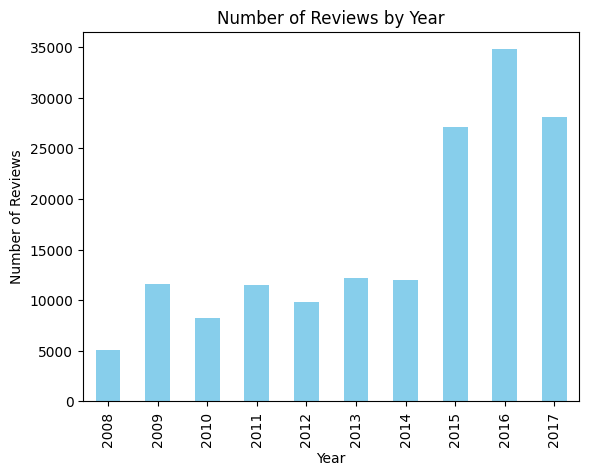

In [12]:
reviews_by_year = df['year'].value_counts().sort_index()
reviews_by_year.plot(kind='bar', color='skyblue')

plt.title('Number of Reviews by Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.show()

no of reviews became particularly popular or relevant in 2015, and while interest may have slightly declined in the following years, it remained significantly higher than before 2015

In [13]:
! pip install wordcloud
from wordcloud import WordCloud

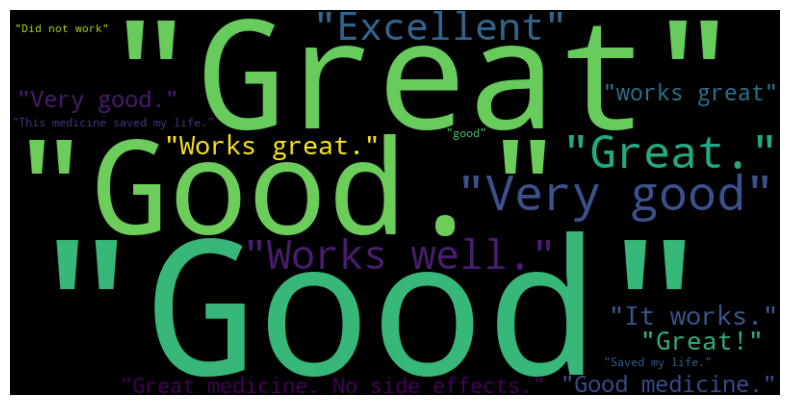

In [14]:
drug_counts = df['review'].value_counts()
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(drug_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

word cloud from the frequency of words in a column named ‘review’. A word cloud is a visual representation of text data, where the size of each word indicates its frequency or importance. The image shows a word cloud with positive words and phrases, such as “Good”, “Great”, and “No side effects”. This suggests that the reviews are mostly favorable and satisfied with the medication or drugs.

In [15]:
min_review_row = df[df['review'] == df['review'].min()]

max_review_row = df[df['review'] == df['review'].max()]

min_condition = min_review_row['condition'].iloc[0]
max_condition = max_review_row['condition'].iloc[0]

print("Condition with Minimum review:", min_condition)
print("Condition with Maximum review:", max_condition)

Condition with Minimum review: Generalized Anxiety Disorde
Condition with Maximum review: Erectile Dysfunction


In [16]:
(df['condition'].value_counts() < 500).sum()

824

In total, the dataset covers 884 unique conditions.Dataset is heavily skewed towards a few specific conditions. The conditions ‘Birth Control’, ‘Depression’, ‘Pain’, ‘Anxiety’, and ‘Acne’ are significantly more represented in the dataset, each with over 5000 instances.Conversely, there are 824 conditions that have fewer than 500 instances each. This indicates a long tail distribution of conditions, where a large number of conditions each have a small number of instances.

In [17]:
threshold_count = 100

# Get the value counts for each condition
condition_counts = df['condition'].value_counts()

# Filter conditions based on the threshold count
valid_conditions = condition_counts[condition_counts >= threshold_count].index

# Filter the DataFrame based on the valid conditions
filtered_df = df[df['condition'].isin(valid_conditions)]


In [18]:
filtered_df['condition'].nunique()

150

In [19]:
groups = {
    "Urinary,Kidney Conditions": ["Urinary Tract Stones", "Kidney Infections","Urinary Incontinence","Interstitial Cystitis","Overactive Bladder"],
    "Nervous System": ["Vertig", "Parkinson's Disease", "Sciatica","ADHD"],
    "Cancer": ["Breast Cancer, Metastatic", "Prostate Cance"],
    "Supplements": ["Dietary Supplementation"],
    "Infections": ["HIV Infection","Hepatitis C","Bacterial Infection","Urinary Tract Infection","Vaginal Yeast Infection","Kidney Infections","Bladder Infection","Upper Respiratory Tract Infection"
                   "Helicobacter Pylori Infection","Chlamydia Infection","Pneumonia"],
    "Musculoskeletal condition": ["Gout"],
    "Respiratory and Pulmonary Conditions":["Tonsillitis/Pharyngitis", "Cold Symptoms", "Asthma, acute","Strep Throat","COPD","Cough","Allergic Rhinitis","Nasal Congestion","Influenza"
                                            "Cough and Nasal Congestion"],
    "Reproductive and Sexual Health:": ["Nausea/Vomiting of Pregnancy", "Period Pain","Ovarian Cysts"," Chronic Endometriosis","Premenstrual Dysphoric Disorder","Menstrual Disorders","Postmenopausal Symptoms"
                           "Polycystic Ovary Syndrome","Benign Prostatic Hyperplasia","Erectile Dysfunction","Emergency Contraception","Benign Prostatic Hyperplasia (BPH)","Abnormal Uterine Bleeding"],
    "Metabolic and Endocrine Disorders":["Diabetes, Type 1","Hypothyroidism, After Thyroid Removal","Diabetes, Type 2","Obesity","Weight Loss"],
    "Eye Conditions": ["Dry Eye Disease"],
    "Mental Health": ["Borderline Personality Disorder","Generalized Anxiety Disorder","Panic Disorder","Major Depressive Disorder","Anxiety and Stress","Bipolar Disorder",
                      "Sedation","Performance Anxiety","Alcohol Withdrawal","Social Anxiety Disorder","Post Traumatic Stress Disorder","Schizophrenia"],
    "Infections and Immune System":["HIV Infection","Hepatitis C","Bacterial Infection","Helicobacter Pylori Infectio","Chlamydia Infection","Otitis Media","Human Papillomavirus (HPV)"],
    "Cardiovascular Health":["High Cholesterol","High Blood Pressure","Prevention of Thromboembolism in Atrial Fibrillation","Atrial Fibrillation"],
    "Gastrointestinal Issues":["GERD","Irritable Bowel Syndrome","Bowel Preparation","Diarrhea", "Diverticulitis","Ulcerative Colitis, Active","Constipation, Drug Induced"
                               "Crohn's Disease","Crohn's Disease, Maintenance","Ulcerative Colitis","Maintenance Inflammatory Conditions","Acute Motion Sickness"],
    "Neurological and Pain Conditions":["Trigeminal Neuralgia","Cluster Headaches","Seizure Prevention","Peripheral Neuropathy","Diabetic Peripheral Neuropathy","Neuropathic Pain",
                                        "Epilepsy","Restless Legs Syndrome","Obsessive-Compulsive Disorder","Schizoaffective Disorder","Narcolepsy","Seizures","Headache","Chronic Pain"
                                        "Multiple Sclerosis","Migraine Prevention","Chronic Pain","Migraine","Insomnia"],
    "Dermatological Conditions":["Atopic Dermatitis","Eczema","Herpes Simplex, Suppression","Psoriatic Arthritis","Plaque Psoriasis","Rosacea","Cold Sores",
                                 "Keratosis","Psoriasis","Keratosis", "Bacterial Skin Infection","Skin or Soft Tissue Infection"],
    "Substance Use and Dependence":["Opiate Dependence","Opiate Dependence","Smoking Cessation"]
}

In [20]:
for group, conditions in groups.items():
    filtered_df.loc[filtered_df['condition'].isin(conditions), 'condition'] = group

In [21]:
filtered_df['condition'].nunique()

80

In [22]:
filtered_df['condition'].value_counts()

Birth Control                                 28788
Neurological and Pain Conditions              11760
Metabolic and Endocrine Disorders             10022
Depression                                     9069
Reproductive and Sexual Health:                6970
                                              ...  
Eye Conditions                                  147
Musculoskeletal condition                       105
0</span> users found this comment helpful.      104
Supplements                                     102
Human Papilloma Virus                           102
Name: condition, Length: 80, dtype: int64

In [23]:
filtered_df = filtered_df[~filtered_df['condition'].str.contains("0</span> users found this comment helpful")]

In [24]:
filtered_df['condition'].nunique()

79

In [25]:
from sklearn.preprocessing import LabelEncoder
conditions = filtered_df['condition']

label_encoder = LabelEncoder()
encoded_conditions = label_encoder.fit_transform(conditions)
filtered_df['condition_encoded'] = encoded_conditions

# Display the mapping of labels to original conditions
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label mapping:")
for condition, label in label_mapping.items():
    print(f"{condition}: {label}")

print(filtered_df[['condition', 'condition_encoded']])


Label mapping:
Acne: 0
Alcohol Dependence: 1
Allergies: 2
Anesthesia: 3
Ankylosing Spondylitis: 4
Anxiety: 5
Asthma: 6
Asthma, Maintenance: 7
Atrophic Vaginitis: 8
Back Pain: 9
Bacterial Vaginitis: 10
Bipolar Disorde: 11
Birth Control: 12
Borderline Personality Disorde: 13
Breast Cance: 14
Bronchitis: 15
COPD, Maintenance: 16
Cancer: 17
Cardiovascular Health: 18
Constipation: 19
Constipation, Chronic: 20
Constipation, Drug Induced: 21
Cough and Nasal Congestion: 22
Crohn's Disease: 23
Depression: 24
Dermatological Conditions: 25
Endometriosis: 26
Eye Conditions: 27
Gastrointestinal Issues: 28
Generalized Anxiety Disorde: 29
Gout, Acute: 30
Hashimoto's disease: 31
Helicobacter Pylori Infection: 32
Herpes Simplex: 33
Hot Flashes: 34
Human Papilloma Virus: 35
Hyperhidrosis: 36
Hypogonadism, Male: 37
Infections: 38
Infections and Immune System: 39
Inflammatory Conditions: 40
Influenza: 41
Major Depressive Disorde: 42
Mental Health: 43
Metabolic and Endocrine Disorders: 44
Motion Sickness: 

In [26]:
label_mapping

{'Acne': 0,
 'Alcohol Dependence': 1,
 'Allergies': 2,
 'Anesthesia': 3,
 'Ankylosing Spondylitis': 4,
 'Anxiety': 5,
 'Asthma': 6,
 'Asthma, Maintenance': 7,
 'Atrophic Vaginitis': 8,
 'Back Pain': 9,
 'Bacterial Vaginitis': 10,
 'Bipolar Disorde': 11,
 'Birth Control': 12,
 'Borderline Personality Disorde': 13,
 'Breast Cance': 14,
 'Bronchitis': 15,
 'COPD, Maintenance': 16,
 'Cancer': 17,
 'Cardiovascular Health': 18,
 'Constipation': 19,
 'Constipation, Chronic': 20,
 'Constipation, Drug Induced': 21,
 'Cough and Nasal Congestion': 22,
 "Crohn's Disease": 23,
 'Depression': 24,
 'Dermatological Conditions': 25,
 'Endometriosis': 26,
 'Eye Conditions': 27,
 'Gastrointestinal Issues': 28,
 'Generalized Anxiety Disorde': 29,
 'Gout, Acute': 30,
 "Hashimoto's disease": 31,
 'Helicobacter Pylori Infection': 32,
 'Herpes Simplex': 33,
 'Hot Flashes': 34,
 'Human Papilloma Virus': 35,
 'Hyperhidrosis': 36,
 'Hypogonadism, Male': 37,
 'Infections': 38,
 'Infections and Immune System': 39,

In [27]:
filtered_df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,year,condition_encoded
1,95260,Guanfacine,Nervous System,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,2010,50
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,2009,12
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10,2015,12
4,35696,Buprenorphine / naloxone,Substance Use and Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37,2016,71
5,155963,Cialis,Reproductive and Sexual Health:,"""2nd day on 5mg started to work with rock hard...",2,2015-11-28,43,2015,65


In [28]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [29]:
def clean_text(review):
    # I. Removing URL
    review = re.sub(r'http\S+', '', review)
    
    # II. Removing all irrelevant characters (Numbers and Punctuation)
    review = re.sub(f"[{string.punctuation}0-9]", "", review)
    
    # III. Convert all characters into lowercase
    review = review.lower()
    
    # IV. Tokenization
    tokens = review.split()
    
    # V. Removing Stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # VI. Stemming and Lemmatization
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    tokens = [stemmer.stem(lemmatizer.lemmatize(word)) for word in tokens]
    
    # VII. Remove the words having length <= 2
    tokens = [word for word in tokens if len(word) > 2]
    
    # VIII. Convert the list of tokens back to a string
    cleaned_review = ' '.join(tokens)
    
    return cleaned_review


stop_words = stopwords.words('english')

In [30]:
# Apply the clean_text function to the "Review Text" column of the DataFrame
filtered_df['review'] = filtered_df['review'].apply(clean_text)

In [31]:
filtered_df['review']

1         son halfway fourth week intuniv becam concern ...
2         use take anoth oral contracept pill cycl happi...
3         first time use form birth control glad went pa...
4         suboxon complet turn life around feel healthie...
5         day start work rock hard erect howev experianc...
                                ...                        
161292    wrote first report midoctob alcohol sinc post ...
161293    given surgey immedi becam anxiou could sit sti...
161294    limit improv month develop bad rash refus cont...
161295    ive thyroid medic year spent first synthroid v...
161296    ive chronic constip adult life tri linz work m...
Name: review, Length: 148311, dtype: object

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(filtered_df['review'], filtered_df['condition_encoded'], test_size=0.2, random_state=42)

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [35]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

MultinomialNB()

In [36]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

y_pred = clf.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy})')

Accuracy: 0.6335165020395779)


In [ ]:
precision_weighted = precision_score(y_test, y_pred, average='weighted')
recall_weighted = recall_score(y_test, y_pred, average='weighted')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

print(f'Precision (Weighted): {precision_weighted}')
print(f'Recall (Weighted): {recall_weighted}')
print(f'F1 Score (Weighted): {f1_weighted}')

Precision (Weighted): 0.6269515139492228
Recall (Weighted): 0.6335165020395779
F1 Score (Weighted): 0.5786423323553767


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', solver='saga', penalty='elasticnet', l1_ratio=0.5)

model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print(f'Accuracy: {accuracy}')
precision_weighted = precision_score(y_test, y_pred, average='weighted')
recall_weighted = recall_score(y_test, y_pred, average='weighted')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

print(f'Precision (Weighted): {precision_weighted}')
print(f'Recall (Weighted): {recall_weighted}')
print(f'F1 Score (Weighted): {f1_weighted}')

Accuracy: 0.7367090314533257
Precision (Weighted): 0.7349847909970116
Recall (Weighted): 0.7367090314533257
F1 Score (Weighted): 0.7232480559628806


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train_tfidf, y_train)

y_pred = rf_classifier.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy})')


precision_weighted = precision_score(y_test, y_pred, average='weighted')
recall_weighted = recall_score(y_test, y_pred, average='weighted')
f1_weighted = f1_score(y_test, y_pred, average='weighted')


print(f'Precision (Weighted): {precision_weighted}')
print(f'Recall (Weighted): {recall_weighted}')
print(f'F1 Score (Weighted): {f1_weighted}')

Accuracy: 0.8046724876108283)
Precision (Weighted): 0.8205344246776498
Recall (Weighted): 0.8046724876108283
F1 Score (Weighted): 0.7969805839331867


In [38]:
X_train_tfidf.shape

(118648, 5000)

In [43]:
from sklearn.linear_model import PassiveAggressiveClassifier
pa_classifier = PassiveAggressiveClassifier()

batch_size = 256
num_samples = X_train_tfidf.shape[0]

for i in range(0, num_samples, batch_size):
    X_batch = X_train_tfidf[i:i + batch_size]
    y_batch = y_train[i:i + batch_size]
    pa_classifier.partial_fit(X_batch, y_batch, classes=np.unique(y_train))

# Evaluate the model on the testing set
y_pred = pa_classifier.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7279776152108688


In [ ]:
precision_weighted = precision_score(y_test, y_pred, average='weighted')
recall_weighted = recall_score(y_test, y_pred, average='weighted')
f1_weighted = f1_score(y_test, y_pred, average='weighted')


print(f'Precision (Weighted): {precision_weighted}')
print(f'Recall (Weighted): {recall_weighted}')
print(f'F1 Score (Weighted): {f1_weighted}')

Precision (Weighted): 0.7150514040761741
Recall (Weighted): 0.7219768735461686
F1 Score (Weighted): 0.7147631080268719


In [44]:
from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier()

batch_size = 256
num_samples = X_train_tfidf.shape[0]

for i in range(0, num_samples, batch_size):
    X_batch = X_train_tfidf[i:i + batch_size]
    y_batch = y_train[i:i + batch_size]
    sgd_classifier.partial_fit(X_batch, y_batch, classes=np.unique(y_train))

# Evaluate the model on the testing set
y_pred = sgd_classifier.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7165829484543034


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
param_grid = {
    'loss': ['hinge', 'log', 'modified_huber'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
}

# Split the data
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_tfidf, y_train, test_size=0.2, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(sgd_classifier, param_grid, cv=3, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_split, y_train_split)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the best model on the validation set
best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy with Best Model: {val_accuracy}")

# Evaluate the best model on the testing set
y_test_pred = best_model.predict(X_test_tfidf)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy with Best Model: {test_accuracy}")

Best Hyperparameters: {'alpha': 0.0001, 'learning_rate': 'optimal', 'loss': 'modified_huber', 'penalty': 'l2'}
Validation Accuracy with Best Model: 0.7411715128529288
Testing Accuracy with Best Model: 0.7422040926406634


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score


dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define XGBoost parameters
params = {
    'objective': 'multi:softmax',  # Multiclass classification
    'num_class': len(set(y_train)),  # No of classes
    'eval_metric': 'merror',  # Evaluation metric
    'eta': 0.1,  # Learning rate
    'max_depth': 6,  # Maximum depth of a tree
    'subsample': 0.8,  # Subsample ratio of the training instances
    'colsample_bytree': 0.8,  # Subsample ratio of columns when constructing each tree
    'seed': 42
}

# Train the XGBoost model
num_rounds = 100  # Number of boosting rounds
xgb_model = xgb.train(params, dtrain, num_rounds)

# Predict on the test set
y_pred = xgb_model.predict(dtest)


y_pred = y_pred.astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}') 

Accuracy: 0.7441931025182887


In [ ]:
# Example of a new input text

new_text = "I&#039;ve tried a few antidepressants over the years (citalopram, fluoxetine, amitriptyline), but none of those helped with my depression, insomnia &amp; anxiety. My doctor suggested and changed me onto 45mg mirtazapine and this medicine has saved my life. Thankfully I have had no side effects especially the most common - weight gain, I&#039;ve actually lost alot of weight. I still have suicidal thoughts but mirtazapine has saved me."
206473,"Mesalamine","Crohn's Disease, Maintenance","My son has Crohn&#039;s disease and has done very well on the Asacol.  He has no complaints and shows no side effects.  He has taken as many as nine tablets per day at one time.  I&#039;ve been very happy with the results, reducing his bouts of diarrhea drastically."



# Preprocess the new input text using the clean_text function
preprocessed_text = clean_text(new_text)

# Transform the preprocessed text into TF-IDF features using the same vectorizer
new_text_features = vectorizer.transform([preprocessed_text])

# Make predictions using the trained logistic regression model
predicted_condition = model.predict(new_text_features)

predicted_condition_name = label_encoder.inverse_transform([predicted_condition])[0]


# Display the predicted condition
print("Predicted Condition for the New Input Text:")
print(predicted_condition_name)


Predicted Condition for the New Input Text:
Depression


In [ ]:

import joblib

# Save TF-IDF vectorizer to a Joblib file
with open('tfidf_vectorizer.joblib', 'wb') as file:
    joblib.dump(vectorizer, file)


# with open('rf_classifier.Joblib', 'wb') as file:
#     joblib.dump(rf_classifier, file)

In [ ]:
with open('label_encoder.joblib', 'wb') as file:
    joblib.dump(label_encoder, file)

In [ ]:
# Save Logistic Regression model to a Joblib file
with open('model.joblib', 'wb') as file:
    joblib.dump(model, file)

In [5]:
df['condition'][1256]

'Anxiety and Stress'

In [6]:
df['review'][1256]

'"I was prescribed Sertraline a few days ago after having a severe panic attack (yet again). After explaining my family history to the doctor he concluded that my anxiety was probably caused by an underlying depression/ slight bipolar disorder that was never diagnosed or treated. As much as I tried to wish I was &quot;normal&quot; and denied having the same issues as many of my family members I just have to accept that I have inherited that gene. I am still nervous about being on medicines but I am hoping it helps to get my emotions under control."'